In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [34]:
data = pd.read_csv('../datasets/data.csv')

In [35]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [37]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [38]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [39]:
data.shape

(569, 33)

In [40]:
data.drop('id', axis=1, inplace=True)

In [41]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [42]:
data.isna().any().any()

False

In [43]:
Y = data['diagnosis']
X = data.drop('diagnosis', axis=1)

In [44]:
Y.unique()

array(['M', 'B'], dtype=object)

[Text(0, 0, '357'), Text(0, 0, '212')]

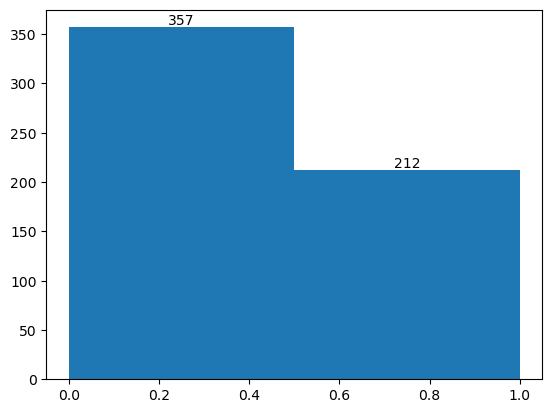

In [51]:
lines, edges, bins = plt.hist(Y, bins=2)
plt.bar_label(bins)

In [46]:
Y.replace('B', 0, inplace=True)
Y.replace('M', 1, inplace=True)

In [47]:
Y.unique()

array([1, 0])

In [48]:
feature_names = X.columns
feature_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=123, stratify=Y
)

In [52]:
def IQR(data, feature_names):
    iqr = pd.DataFrame(0, index=feature_names, columns=['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percentage'])
    
    for name in feature_names:
        (Q1, Q3) = X[name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
        
        iqr.loc[name, 'upper'] = upper
        iqr.loc[name, 'lower'] = lower 
        
        num_of_out_lower = (X[name] < lower).sum()
        num_of_out_upper = (X[name] > upper).sum()
        
        percentage = round((num_of_out_lower + num_of_out_upper) / X.shape[0] * 100)
        
        iqr.loc[name, 'num_lower'] = num_of_out_lower
        iqr.loc[name, 'num_upper'] = num_of_out_upper 
        iqr.loc[name, 'percentage'] = percentage
        
    return iqr

In [53]:
IQR(X_train, feature_names)

,lower,min,num_lower,upper,max,num_upper,percentage
radius_mean,5.580000,0,0,21.900000,0,14,2
texture_mean,7.725000,0,0,30.245000,0,7,1
perimeter_mean,31.775000,0,0,147.495000,0,13,2
area_mean,-123.300000,0,0,1326.300000,0,25,4
smoothness_mean,0.057975,0,1,0.133695,0,5,1
compactness_mean,-0.033300,0,0,0.228620,0,16,3
concavity_mean,-0.122150,0,0,0.282410,0,18,3
concave points_mean,-0.060225,0,0,0.154535,0,10,2
symmetry_mean,0.111200,0,1,0.246400,0,14,3
fractal_dimension_mean,0.045070,0,0,0.078750,0,15,3


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
scaler.fit(X_train)

MinMaxScaler()

In [57]:
X_train = scaler.transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
def report(y, y_pred, title='train'):
    print(title)
    print('-'*100)
    print(classification_report(y, y_pred))
    print('-'*100)
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))

In [60]:
model = KNeighborsClassifier()

In [61]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
report(y_train, model.predict(X_train))

train
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       267
           1       0.98      0.96      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426

----------------------------------------------------------------------------------------------------
     B    M
B  264    3
M    7  152


/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [63]:
report(y_test, model.predict(X_test), 'test')

test
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

----------------------------------------------------------------------------------------------------
    B   M
B  87   3
M   3  50


/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [64]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [65]:
params = {
    'n_neighbors': range(10, 50, 5),
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}

In [66]:
estimator = GridSearchCV(KNeighborsClassifier(), param_grid=params, verbose=5, cv=10)

In [67]:
estimator.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10] END n_neighbors=10, p=1, weights=uniform;, score=0.977 total time=   0.0s
[CV 2/10] END n_neighbors=10, p=1, weights=uniform;, score=0.953 total time=   0.0s
[CV 3/10] END n_neighbors=10, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10] END n_neighbors=10, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10] END n_neighbors=10, p=1, weights=uniform;, score=0.977 total time=   0.0s
[CV 6/10] END n_neighbors=10, p=1, weights=uniform;, score=0.953 total time=   0.0s
[CV 7/10] END n_neighbors=10, p=1, weights=uniform;, score=0.952 total time=   0.0s
[CV 8/10] END n_neighbors=10, p=1, weights=uniform;, score=0.905 total time=   0.0s
[CV 9/10] END n_neighbors=10, p=1, weights=uniform;, score=0.976 total time=   0.0s
[CV 10/10] END n_neighbors=10, p=1, weights=uniform;, score=0.976 total time=   0.0s
[CV 1/10] END n_neighbors=10, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 2/10] E

/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

[CV 6/10] END n_neighbors=25, p=1, weights=distance;, score=0.930 total time=   0.0s
[CV 7/10] END n_neighbors=25, p=1, weights=distance;, score=0.952 total time=   0.0s
[CV 8/10] END n_neighbors=25, p=1, weights=distance;, score=0.881 total time=   0.0s
[CV 9/10] END n_neighbors=25, p=1, weights=distance;, score=0.952 total time=   0.0s
[CV 10/10] END n_neighbors=25, p=1, weights=distance;, score=0.976 total time=   0.0s
[CV 1/10] END n_neighbors=25, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10] END n_neighbors=25, p=2, weights=uniform;, score=0.953 total time=   0.0s
[CV 3/10] END n_neighbors=25, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10] END n_neighbors=25, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10] END n_neighbors=25, p=2, weights=uniform;, score=0.977 total time=   0.0s
[CV 6/10] END n_neighbors=25, p=2, weights=uniform;, score=0.930 total time=   0.0s
[CV 7/10] END n_neighbors=25, p=2, weights=uniform;, score=0.952 total

/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

[CV 1/10] END n_neighbors=40, p=2, weights=distance;, score=0.953 total time=   0.0s
[CV 2/10] END n_neighbors=40, p=2, weights=distance;, score=0.953 total time=   0.0s
[CV 3/10] END n_neighbors=40, p=2, weights=distance;, score=0.977 total time=   0.0s
[CV 4/10] END n_neighbors=40, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 5/10] END n_neighbors=40, p=2, weights=distance;, score=0.953 total time=   0.0s
[CV 6/10] END n_neighbors=40, p=2, weights=distance;, score=0.930 total time=   0.0s
[CV 7/10] END n_neighbors=40, p=2, weights=distance;, score=0.976 total time=   0.0s
[CV 8/10] END n_neighbors=40, p=2, weights=distance;, score=0.881 total time=   0.0s
[CV 9/10] END n_neighbors=40, p=2, weights=distance;, score=0.952 total time=   0.0s
[CV 10/10] END n_neighbors=40, p=2, weights=distance;, score=0.976 total time=   0.0s
[CV 1/10] END n_neighbors=45, p=1, weights=uniform;, score=0.953 total time=   0.0s
[CV 2/10] END n_neighbors=45, p=1, weights=uniform;, score=0.930 

/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/natasa/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=5)

In [68]:
estimator.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [69]:
model = estimator.best_estimator_

In [70]:
report(y_train, model.predict(X_train))

train
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

----------------------------------------------------------------------------------------------------
     B    M
B  267    0
M    0  159


In [71]:
report(y_test, model.predict(X_test), 'test')

test
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

----------------------------------------------------------------------------------------------------
    B   M
B  86   4
M   4  49
